- 데이터에 집중해보자!
- 특수한 데이터를 전처리해보자구

# 시간 시각화

- 시점 요소가 있는 데이터는 시계열(Time series)형태로 표현할 수 있음
- 시간의 흐름에 딸ㄴ 데이터의 변화를 표현
- 전체적인 흐름을 한눈에 확인할 수 잇고, 데이터의 트렌드나 노이즈도 쉽게 찾아낼 수 있음

 - 시간 시각화는 선 그래프 형태인 연속형과 막대 그래프의 형태이니 분절형으로 구분

- 연속형 시간 시각화
    - 선 그래프
    - 시간 간격의 밀도가 높을 때 주로 사용
    - 예) 초 단위의 공정 센서데이터, 일년간의 일별 판매량 데이터
   
    - 데이터의 양이 너무 많거나 변동이 심하면 트렌드나 패턴을 파악하는 것이 어려울 수 있음
    - 이 경우는 추세선을 삽입하여 들ㅉ구날쭉한 데이터 흐름을 안정된 선으로 표현하는 것도 가능

    - 전체적인 경향이나 패턴을 쉡게 파악하는 것이 목적
      
    - 추세선 그리는 가장 일반적인 방법은 이동평균(moving average) 방법을 사용하는 것
        - 이동 평균법 : 데이터의 연속적인 그룹의 평균을 구하는 것
        - 예 ) 시간의 흐름에 딸 2- 5- 3- 7- 4 의 값이 있다면 3개으 시점씩 평균을 구해 (2,5,3) 의 평균 => (5,3,7)의 평균 => (3,7,4) 의 평균로 표현하는것 

- 분절형 시간 시각화
    - 막대 그래프, 누적 막대그래프, 점그래프 등
    - 시간의 밀도가 낮은 경우에 주로 사용
        - 예) 1년 동안의 월 간격 단위 흐름
    - 값들의 상대적인 차이를 나타내는 것에 유리
    - 막대에 색상을 표현하여 특정시점에 대한 정보를 추가할 수도 있음
    - 누적 막대그래프는 한 시점에 2개이사의 세부 항목이 존재할 때 사용
        - 예) A,B,C 품목의 월별 판매량 데이터를 표현하고자 할 때, 각 품목의 판매량을 색상이나 질감으로 차이를 주어 한의 막대로 표현
    - 각 품목 전체의 합을 함께 표현할 수 있다는 것이 장점
    - 각 품목의 판매량을 전체 판매량의 비율로 환산하여 절대적 비율을 비교할 수 있도록 표현할 수도 있음

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [5]:
df = pd.read_csv("./data/superstore.csv")

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


- 일자별 고객들의 제품 판매 정보가 기록되어 있음

In [10]:
df.shape

(9800, 18)

In [11]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [15]:
# data 데이터는 날짜형식으로 변환
df["Order Date2"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")

In [16]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date               object
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Order Date2      datetime64[ns]
dtype: object

In [17]:
df = df.sort_values("Order Date2", ascending=True)

In [19]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Date2
1297,1298,CA-2018-115427,30/12/2018,03/01/2019,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2018-12-30
906,907,CA-2018-143259,30/12/2018,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,2018-12-30
645,646,CA-2018-126221,30/12/2018,05/01/2019,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2018-12-30
908,909,CA-2018-143259,30/12/2018,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,2018-12-30
5091,5092,CA-2018-156720,30/12/2018,03/01/2019,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538.0,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,2018-12-30


In [ ]:
# 년도별 매출액의 흐름을 보려고 한다

In [22]:
# 연도 컬럼 생성
df["year"] = df["Order Date2"].dt.year

In [21]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Date2,year
7980,7981,CA-2015-103800,03/01/2015,07/01/2015,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2015-01-03,2015
741,742,CA-2015-112326,04/01/2015,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2015-01-04,2015
740,741,CA-2015-112326,04/01/2015,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,2015-01-04,2015
739,740,CA-2015-112326,04/01/2015,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,2015-01-04,2015
1759,1760,CA-2015-141817,05/01/2015,12/01/2015,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,2015-01-05,2015


In [23]:
df["year"].unique()

array([2015, 2016, 2017, 2018], dtype=int32)

In [24]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Date2,year
1297,1298,CA-2018-115427,30/12/2018,03/01/2019,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2018-12-30,2018
906,907,CA-2018-143259,30/12/2018,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,2018-12-30,2018
645,646,CA-2018-126221,30/12/2018,05/01/2019,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2018-12-30,2018
908,909,CA-2018-143259,30/12/2018,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,2018-12-30,2018
5091,5092,CA-2018-156720,30/12/2018,03/01/2019,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538.0,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,2018-12-30,2018


In [25]:
# 2018 년도의 1년간 매출 데이터를 뽑아보자
df_line = df[df["year"] == 2018]

In [29]:
# 일별 매출액을 만들어야해요

# 일별로 그룹바이하고 매출액을 더하면 일별 매출이 나오죵
df_line = df_line.groupby("Order Date2")["Sales"].sum().reset_index()
df_line.head()

,Order Date2,Sales
0,2018-01-01,1481.828
1,2018-01-02,2079.554
2,2018-01-03,2070.272
3,2018-01-06,33.740
4,2018-01-07,3395.590


[정리]
- 기존의 Order Date 컬럼을 날짜 형식으로 변환하고 연도 구분 컬럼 생성

- 2018년도 데이터만 필터링

- groupby 를 사용하여 일별 매출액을 가공

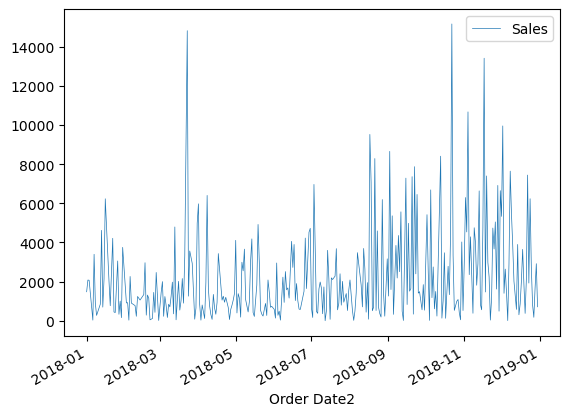

In [32]:
# 선 시각화를 해보자 

# 이동 평균선을 넣으면 추세를 파악하기 수비다
ax = df_line.plot(
    x = "Order Date2",
    y = "Sales",
    linewidth = 0.5
)
plt.show()

In [33]:
# 30일 이동평균 생성
df_line["Month"] = df_line["Sales"].rolling(window = 30).mean() # 구른다...구른다...
# 30일의 데이터를 구간을 잡습니다 그리고 그 구간의 평균을 계산함
# 지난 30일간의 값의 평균을 구했기 때문에 0 ~ 29 index 의 값은 NaN 입니다

In [34]:
df_line

,Order Date2,Sales,Month
0,2018-01-01,1481.8280,NaN
1,2018-01-02,2079.5540,NaN
2,2018-01-03,2070.2720,NaN
3,2018-01-06,33.7400,NaN
4,2018-01-07,3395.5900,NaN
...,...,...,...
317,2018-12-26,814.5940,3276.087267
318,2018-12-27,177.6360,3113.736067
319,2018-12-28,1657.3508,3115.039293
320,2018-12-29,2915.5340,2981.792293


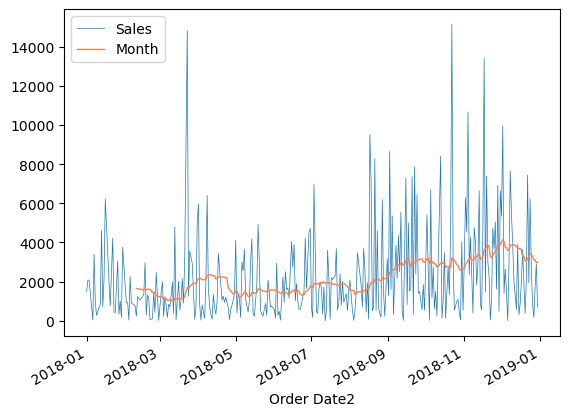

In [38]:
# 선 시각화를 해보자 

# 이동 평균선을 넣으면 추세를 파악하기 쉽다!
ax = df_line.plot(
    x = "Order Date2",
    y = "Sales",
    linewidth = 0.5
)
# 이녀석이 이동 평균선 
# 흐름을 파악하기 쉽다!!
df_line.plot(
     x = "Order Date2",
    y = "Month",
    color = "#FF7F50",
    linewidth = 1,
    ax = ax
)
plt.show()

- 앞에서 가공한 데이터셋을 활용하여 선그래프를 시각화

- 30일 이동평균션을 삽입하기 위해 rolling () 함수를 사용하여 Month 컬럼을 새로 생성

- 2018년도의 일자별 매출액이 잘 나타나지만 매출액 편차가 커서 일 매출선으로 전체적인 추이를 가늠하기 힘듦
    - 이런 경우 이동 평균선이 도움이 될 수 있음
    - Month 선을 통해 5월부터 매출이 감소했다가 8월부터 상승하는 것을 직관적으로 봄

# 막대 그래프

In [39]:
# 년도별 판매량 데이터 가공
df_bar_1 = df.groupby("year")["Sales"].sum().reset_index()
df_bar_1.head()

,year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


- 막대 그래프 시각화를 위해 연도별 매출액 데이터를 가공함!
- Year 컬럼 이용

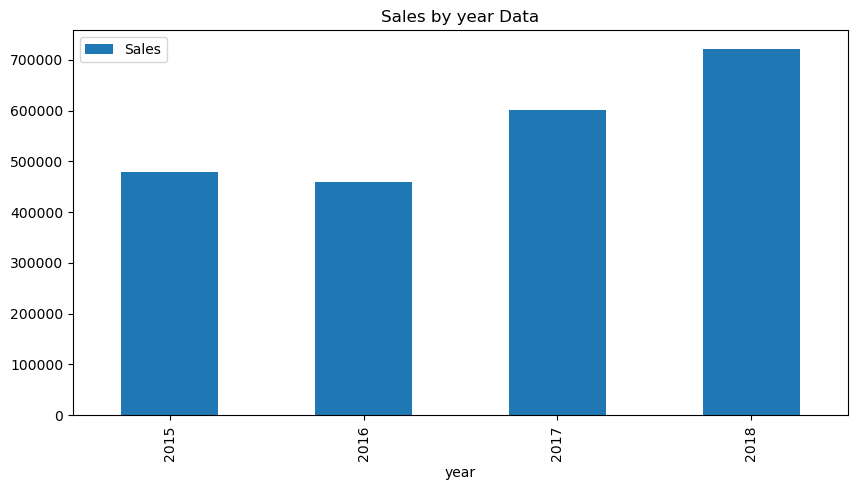

In [53]:
# 연도별 매출액 막대 그래프 시각화 
ax = df_bar_1.plot.bar(
    x = "year",
    y = "Sales",
    figsize = (10,5),
)
plt.title("Sales by year Data")
plt.show()

- 단순한 연도별 매출액 막대 그래프가 생성됨

- 2016년도에 매출액 다소 감소했다가

-  2017, 2018년도에는 증가

In [51]:
# 정보를 추가할수있다!
# 정보를 추가할수있다!
# 정보를 추가할수있다!
# 정보를 추가할수있다!
# 정보를 추가할수있다!
# 정보를 추가할수있다!
# 정보를 추가할수있다!
# 정보를 추가할수있다!
# 정보를 추가할수있다!
# 정보를 추가할수있다!
# 정보를 추가할수있다!

In [59]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Date2,year
7980,7981,CA-2015-103800,03/01/2015,07/01/2015,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2015-01-03,2015
741,742,CA-2015-112326,04/01/2015,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2015-01-04,2015
740,741,CA-2015-112326,04/01/2015,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,2015-01-04,2015
739,740,CA-2015-112326,04/01/2015,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,2015-01-04,2015
1759,1760,CA-2015-141817,05/01/2015,12/01/2015,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,2015-01-05,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1298,CA-2018-115427,30/12/2018,03/01/2019,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2018-12-30,2018
906,907,CA-2018-143259,30/12/2018,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,2018-12-30,2018
645,646,CA-2018-126221,30/12/2018,05/01/2019,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2018-12-30,2018
908,909,CA-2018-143259,30/12/2018,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,2018-12-30,2018


In [60]:
# segment 컬럼에 따라 년도별로 함 해보자

In [64]:
# pivot_table 으로 쉽게 만들수있구나!!!!!!!!

df_bar_2_pv = df.pivot_table(
    index = "year",
    columns = "Segment",
    values = "Sales",
    aggfunc = "sum",
)

df_bar_2_pv

Segment,Consumer,Corporate,Home Office
year,,,
2015,262956.8006,127797.4957,89101.9118
2016,265356.2933,119675.5989,74404.1132
2017,291142.9652,204977.3178,104072.2670
2018,328604.4719,236043.6624,157403.8849


- 누적 막대 그래프 시각화를 위한 데ㅣ터 가공
- Segment 컬럼을 활용하여 구분에 따라 매출액을 집계

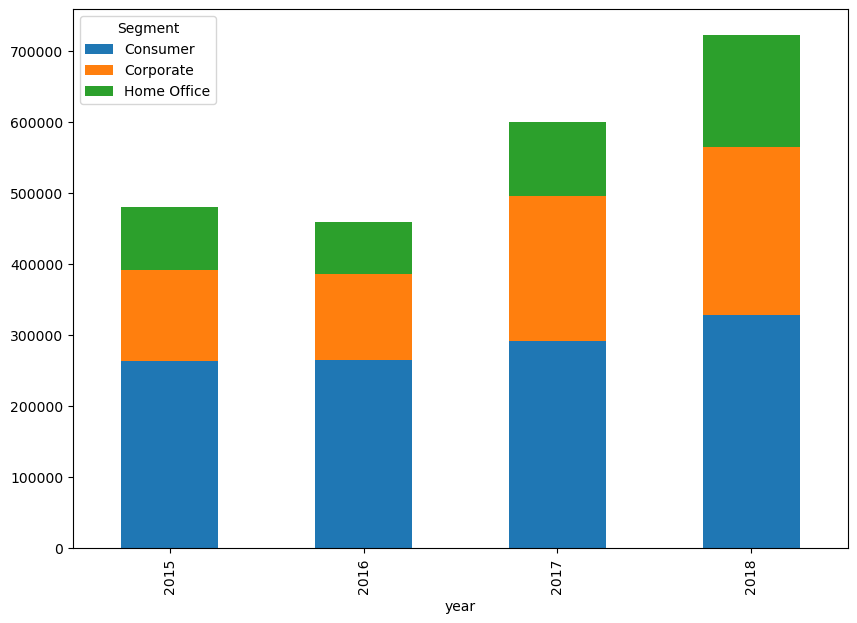

In [68]:

df_bar_2_pv.plot.bar(
    stacked = True, # 누적 막대그래프로 그릴것임
    figsize = (10,7)
)
plt.show()

In [69]:
# 시간 데이터는 이렇게도 보여줄 수 있구나!!!!
# 이동 평균은 이렇게 쓰는구나!!!!!

- 매출액은 앞의 단순 막대 그래프오 ㅏ동일하지만 세 가지 세그먼트의 각 매출액이 구분되어 표현됨
- 이를 통해 각 연도에서 세그먼트별 매출액 비중이 어느정도 되는지 파악할 수 있음
- 만약 STACKED FALSE 면 세개 막대
- 상황에따라서 옵션 조정하셈 

In [72]:
# comperate 가 올랐구나~ 를 알고있었다...

In [71]:
# 분석을 할때 
# 내가 이해야함
# 내가 이해한것을 팀원들에게도 알려줘야함
# 잘 요약하고 정리
# 내가 어떤 내용을 알게되었는지... 알리기!!!!!!!!!!!!!!